<a href="https://colab.research.google.com/github/aisyahdnn/Skripsi/blob/master/Dataset2080.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#untuk menghubungkan drive ke colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Library python yang dipakai

import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #linear algebra
import math
import os #library lokasi path

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

import matplotlib.pyplot as plt

import cv2

In [4]:
terinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA2080/Terinfeksi')
print(terinfeksi_data)

print('\n')

tidakTerinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA2080/TidakTerinfeksi')
print(tidakTerinfeksi_data)

['C33P1thinF_IMG_20150619_114756a_cell_179.png', 'C33P1thinF_IMG_20150619_114756a_cell_182.png', 'C33P1thinF_IMG_20150619_114756a_cell_181.png', 'C33P1thinF_IMG_20150619_114756a_cell_180.png', 'C33P1thinF_IMG_20150619_115740a_cell_163.png', 'C33P1thinF_IMG_20150619_115740a_cell_162.png', 'C33P1thinF_IMG_20150619_115740a_cell_161.png', 'C33P1thinF_IMG_20150619_115808a_cell_205.png', 'C33P1thinF_IMG_20150619_115808a_cell_206.png', 'C33P1thinF_IMG_20150619_120645a_cell_217.png', 'C33P1thinF_IMG_20150619_120645a_cell_216.png', 'C33P1thinF_IMG_20150619_120645a_cell_215.png', 'C33P1thinF_IMG_20150619_120742a_cell_210.png', 'C33P1thinF_IMG_20150619_120804a_cell_224.png', 'C33P1thinF_IMG_20150619_120838a_cell_222.png', 'C33P1thinF_IMG_20150619_121102a_cell_193.png', 'C33P1thinF_IMG_20150619_121229a_cell_178.png', 'C33P1thinF_IMG_20150619_121229a_cell_179.png', 'C33P1thinF_IMG_20150619_121229a_cell_177.png', 'C33P1thinF_IMG_20150619_121300a_cell_156.png', 'C33P1thinF_IMG_20150619_121411a_cell_1

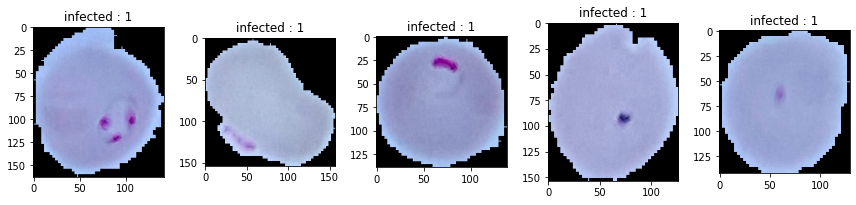

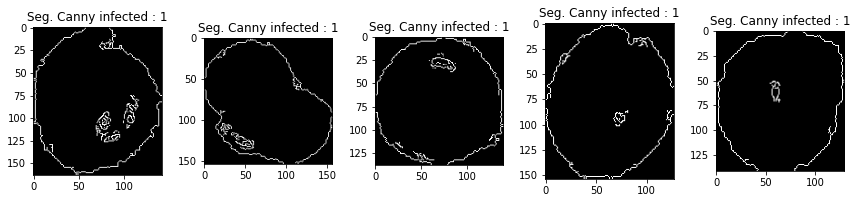

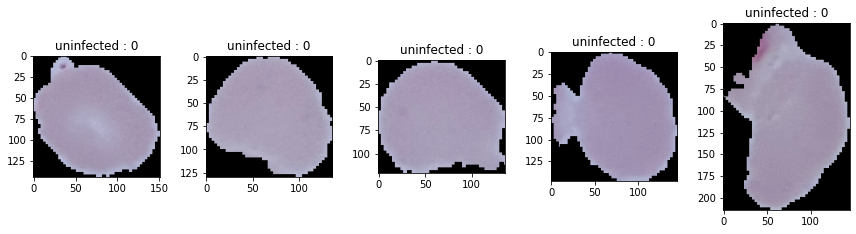

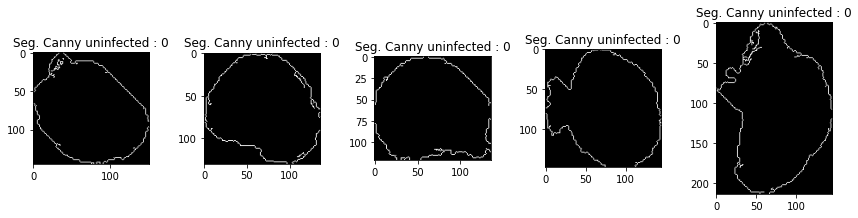

In [5]:
#Tahap Visualisasi Citra Malaria Terinfeksi

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Terinfeksi' + "/" + terinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('infected : 1')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,25,100)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny infected : 1')
    plt.tight_layout()


#Tahap Visualisasi Citra Malaria Tidak Terinfeksi

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,25,100)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny uninfected : 0')
    plt.tight_layout()
plt.show()

In [0]:
#SEGMENTASI CANNY DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Target']])

#Proses Citra Malaria Terinfeksi
for i in range(len(terinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,25,100)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

#Proses Citra Malaria TidakTerinfeksi
for i in range(len(tidakTerinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,25,100)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DatasetMalaria2080.csv", x, fmt='%s',delimiter=',' )

In [8]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DatasetMalaria2080.csv')
print (len(dataset))
print (dataset)

1000
           H1        H2            H3  ...            H6            H7  Target
0    0.016345  0.000002  6.049037e-08  ...  5.659561e-11  4.926718e-14     1.0
1    0.023963  0.000003  1.235240e-06  ... -1.021924e-09  3.040522e-14     1.0
2    0.026203  0.000008  4.487093e-07  ...  6.891313e-10  9.782182e-14     1.0
3    0.028576  0.000040  9.709428e-09  ...  2.584628e-10 -8.364369e-16     1.0
4    0.031878  0.000007  3.233243e-08  ... -2.092504e-10 -7.165870e-15     1.0
..        ...       ...           ...  ...           ...           ...     ...
995  0.022872  0.000042  5.065542e-07  ...  7.448905e-11 -1.906565e-15     0.0
996  0.024198  0.000003  7.968956e-07  ...  1.194816e-11 -7.989414e-16     0.0
997  0.032652  0.000048  3.057302e-07  ...  7.906617e-09  5.879785e-13     0.0
998  0.049467  0.000015  3.832741e-07  ...  9.138349e-10 -9.560569e-14     0.0
999  0.033833  0.000022  4.367405e-07  ...  9.037950e-10 -8.721093e-14     0.0

[1000 rows x 8 columns]
